In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [59]:
info_cargo = pd.read_excel('Dataset 1.xlsx')
info_cargo.dtypes.value_counts()

object            51
int64             28
datetime64[ns]    21
float64            8
bool               1
Name: count, dtype: int64

In [60]:
info_cargo.head(5)

,Номер вагона,Номер накладной,Род вагона,Администрация собственника,Дата и время начала рейса,Государство отправления,Дорога отправления,Станция отправления,Дата и время окончания рейса,Государство назначения,...,Номер уведомления ВУ-23,Номер уведомления ВУ-36,Перевозка завершена,Оператор,Дата завершения перевозки,Срок доставки факт,Простой,Дата завершения,Дата начала,Дата актуальность
0,22793426,ЭХ920086,Крытые (20),РЖД (20),2024-02-18 09:37:00,Российская Федерация,Свердловская (76),Заячья Горка (769407),NaT,Российская Федерация (643),...,84.0,8.0,False,"АО ""ПГК""",NaT,NaN,NaN,NaT,2024-02-18,2024-02-21
1,23592322,ЭХ712064,Крытые (20),РЖД (20),2024-02-12 12:07:00,Российская Федерация,Южно-Уральская (80),Челябинск-Главный (800008),2024-02-19 14:59:00,Российская Федерация (643),...,740.0,66.0,False,"АО ""ПГК""",2024-02-19 14:59:00,7.0,2.0,2024-02-19,2024-02-12,2024-02-21
2,24298762,08401285,Крытые (20),РЖД (20),2024-02-15 22:23:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд:Улаанбаатар И Далее) (937107),NaT,Российская Федерация (643),...,1142.0,123.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-20 15:09:00,5.0,1.0,2024-02-20,2024-02-15,2024-02-21
3,24345407,ЭЦ143114,Крытые (20),РЖД (20),2024-02-18 11:36:00,Российская Федерация,Восточно-Сибирская (92),Залари (930409),NaT,Российская Федерация (643),...,268.0,70.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",NaT,NaN,NaN,NaT,2024-02-18,2024-02-21
4,24345530,08404028,Крытые (20),РЖД (20),2024-02-11 15:01:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд: С.Баатар-У.Бат(Искл) (937003),2024-02-19 11:30:00,Российская Федерация (643),...,260.0,290.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-19 11:30:00,8.0,2.0,2024-02-19,2024-02-11,2024-02-21


Это датасет с 109 фичами, которые как-либо описывают грузовой вагон и моей целью будет предсказать фактическое время в пути вагона с точностью до дней. Давайте немного поиследуем данные

In [61]:
# Рассмотрим нашу целевую переменную
target = info_cargo['Срок доставки факт']
target.describe()

count    11433.000000
mean         8.851745
std          7.547631
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max        170.000000
Name: Срок доставки факт, dtype: float64

Подозрительно большой максимум, давайте проверим на аномалии

<Axes: ylabel='Срок доставки факт'>

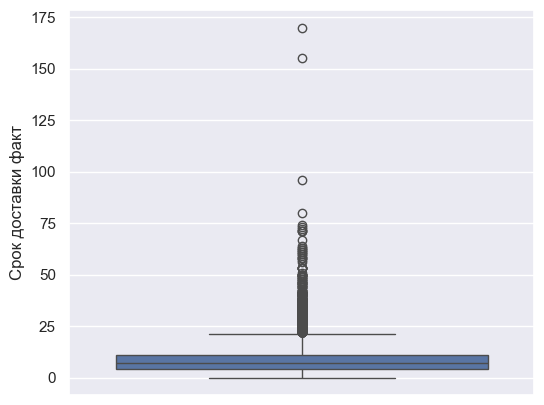

In [62]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,5))
sns.boxplot(target)

Есть прям выраженные аномалии, нужно рассмотреть их

In [63]:
info_cargo[info_cargo['Срок доставки факт'] > 75] 

,Номер вагона,Номер накладной,Род вагона,Администрация собственника,Дата и время начала рейса,Государство отправления,Дорога отправления,Станция отправления,Дата и время окончания рейса,Государство назначения,...,Номер уведомления ВУ-23,Номер уведомления ВУ-36,Перевозка завершена,Оператор,Дата завершения перевозки,Срок доставки факт,Простой,Дата завершения,Дата начала,Дата актуальность
3088,55708689,ЭЛ619325,Крытые (20),РЖД (20),2023-08-02 12:53:00,Российская Федерация,Забайкальская (94),Забайкальск (946801),2024-01-04 11:57:00,Российская Федерация (643),...,160.0,1327.0,True,"АО ""ПГК""",2024-01-04 11:57:00,155.0,9.0,2024-01-04,2023-08-02,2024-01-13
6459,29068160,34789607,Крытые (20),РЖД (20),2023-08-03 01:00:00,Российская Федерация,Октябрьская (1),Антропшино (32406),NaT,Российская Федерация (643),...,591.0,121.0,True,"АО ""ПГК""",2023-11-07 13:45:00,96.0,10.0,2023-11-07,2023-08-03,2023-11-17
6460,29069077,34408241,Крытые (20),РЖД (20),2023-05-21 01:00:00,Российская Федерация,Октябрьская (1),Антропшино (32406),NaT,Российская Федерация (643),...,3325.0,1.0,True,"АО ""ПГК""",2023-11-07 13:45:00,170.0,10.0,2023-11-07,2023-05-21,2023-11-17
8856,52043502,ЭЙ895804,Крытые (20),РЖД (20),2023-06-30 03:59:00,Российская Федерация,Дальневосточная (96),Хабаровск 2 (970001),2023-09-18 17:15:00,Российская Федерация (643),...,2144.0,0.0,True,"АО ""ПГК""",2023-09-18 17:15:00,80.0,19.0,2023-09-18,2023-06-30,2023-10-07


На первый взгляд всё нормально трудно при таком количестве признаков что-то понять, думаю нам стоит избавится от некоторых признаков. В этом нам должен помочь PCA, но для этого нужно предобработать данные

## Работа с пропущенными значениями и первичная обработка 

In [64]:
# Для начало разберёмся с 
info_cargo.isnull().sum().sort_values(ascending=False).head(20) # Очень много аномалий, которые обязательно нужно обработать

Признак аренды                                         12093
Идентификатор отправки по досылке                      12093
Дата исключения                                        12093
Оператор по доверенности                               10157
Арендатор                                               8159
Дата окончания аренды                                   8156
Дата последнего кап. ремонта                            6436
Дата и время прибытия (АСОУП) на станцию назначения     1392
Дата последнего деп. ремонта                             999
Дата и время окончания рейса                             899
Грузополучатель (наим)                                   732
Грузоотправитель (наим)                                  718
Дата завершения перевозки                                660
Срок доставки факт                                       660
Простой                                                  660
Дата завершения                                          660
 Дата и время окончания 

In [65]:
print(info_cargo['Срок доставки факт'].isnull().sum())
print(info_cargo['Перевозка завершена'].value_counts())
print(info_cargo['Дата и время окончания рейса'].isnull().sum())
# Не сходятся числа пропущенных значений в целевой переменной и информации о завершённости перевозки, также есть ещё информация по окончанию рейса, что тоже не сходится надо проверить почему

660
Перевозка завершена
True     11056
False     1037
Name: count, dtype: int64
899


In [66]:
info_cargo[info_cargo['Перевозка завершена'] == False] # Здесь явно замешена колонка простой

,Номер вагона,Номер накладной,Род вагона,Администрация собственника,Дата и время начала рейса,Государство отправления,Дорога отправления,Станция отправления,Дата и время окончания рейса,Государство назначения,...,Номер уведомления ВУ-23,Номер уведомления ВУ-36,Перевозка завершена,Оператор,Дата завершения перевозки,Срок доставки факт,Простой,Дата завершения,Дата начала,Дата актуальность
0,22793426,ЭХ920086,Крытые (20),РЖД (20),2024-02-18 09:37:00,Российская Федерация,Свердловская (76),Заячья Горка (769407),NaT,Российская Федерация (643),...,84.0,8.0,False,"АО ""ПГК""",NaT,NaN,NaN,NaT,2024-02-18,2024-02-21
1,23592322,ЭХ712064,Крытые (20),РЖД (20),2024-02-12 12:07:00,Российская Федерация,Южно-Уральская (80),Челябинск-Главный (800008),2024-02-19 14:59:00,Российская Федерация (643),...,740.0,66.0,False,"АО ""ПГК""",2024-02-19 14:59:00,7.0,2.0,2024-02-19,2024-02-12,2024-02-21
2,24298762,08401285,Крытые (20),РЖД (20),2024-02-15 22:23:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд:Улаанбаатар И Далее) (937107),NaT,Российская Федерация (643),...,1142.0,123.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-20 15:09:00,5.0,1.0,2024-02-20,2024-02-15,2024-02-21
3,24345407,ЭЦ143114,Крытые (20),РЖД (20),2024-02-18 11:36:00,Российская Федерация,Восточно-Сибирская (92),Залари (930409),NaT,Российская Федерация (643),...,268.0,70.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",NaT,NaN,NaN,NaT,2024-02-18,2024-02-21
4,24345530,08404028,Крытые (20),РЖД (20),2024-02-11 15:01:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд: С.Баатар-У.Бат(Искл) (937003),2024-02-19 11:30:00,Российская Федерация (643),...,260.0,290.0,False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-19 11:30:00,8.0,2.0,2024-02-19,2024-02-11,2024-02-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,55708572,ЭФ261346,Крытые (20),РЖД (20),2024-01-15 18:02:00,Российская Федерация,Северо-Кавказская (51),Махачкала (543301),2024-01-22 10:21:00,Российская Федерация (643),...,2232.0,370.0,False,"АО ""ПГК""",2024-01-22 10:21:00,7.0,30.0,2024-01-22,2024-01-15,2024-02-21
1033,55723357,ЭЦ098793,Крытые (20),РЖД (20),2024-02-17 11:16:00,Российская Федерация,Восточно-Сибирская (92),Залари (930409),NaT,Российская Федерация (643),...,473.0,1047.0,False,"АО ""ПГК""",NaT,NaN,NaN,NaT,2024-02-17,2024-02-21
1034,55723548,ЭХ892239,Крытые (20),РЖД (20),2024-02-13 17:04:00,Российская Федерация,Северо-Кавказская (51),Шедок (535907),NaT,Российская Федерация (643),...,2174.0,304.0,False,"АО ""ПГК""",NaT,NaN,NaN,NaT,2024-02-13,2024-02-21
1035,57403214,35691024,Крытые (20),РЖД (20),2024-02-07 12:06:00,Российская Федерация,Восточно-Сибирская (92),Залари (930409),NaT,МОНГОЛИЯ (496),...,1504.0,242.0,False,"АО ""ПГК""",NaT,NaN,NaN,NaT,2024-02-07,2024-02-21


In [67]:
time = info_cargo[['Дата и время окончания рейса','Срок доставки факт', 'Перевозка завершена', 'Простой']][info_cargo['Перевозка завершена'] == False]
print(time.isnull().sum())
time.head(5)

Дата и время окончания рейса    564
Срок доставки факт              538
Перевозка завершена               0
Простой                         538
dtype: int64


,Дата и время окончания рейса,Срок доставки факт,Перевозка завершена,Простой
0,NaT,NaN,False,NaN
1,2024-02-19 14:59:00,7.0,False,2.0
2,NaT,5.0,False,1.0
3,NaT,NaN,False,NaN
4,2024-02-19 11:30:00,8.0,False,2.0


Больше False объясняется, тем что наши вагоны могут приехать, но ещё стоять на станции.
Даты и время окончания рейса очень странно работает и просто по своей сути дублирует информацию, их лучше вообще не учитывать, скорей всего данных нет из-за того что точного времени может быть неизвестно, поэтому и оставили пустым, вообще те случаи когда у нас целевая переменная имеет неизвестные значение, в таких случаях лучше сразу убрать, так как они не имеют смысла для наших моделей.

In [68]:
info_cargo = info_cargo.dropna(subset=['Срок доставки факт'])

info_cargo_imp = info_cargo.drop(columns = ['Дата и время окончания рейса','Идентификатор отправки по досылке', 'Дата исключения','Признак аренды', 'Номер накладной', 'Грузоотправитель (ТГНЛ)', 'Грузоотправитель', 'Грузоотправитель (ОКПО)', 'Грузополучатель (ТГНЛ)','Грузополучатель', 'Грузополучатель (ОКПО)', 'Код груза ГНГ', 'Арендатор', 'Арендатор (ОКПО)', 'Арендатор (локальный код)','Станция приписки аренды','Дата окончания аренды','Оператор по доверенности', 'Оператор по доверенности (ОКПО)', 'Собственник (ОКПО)', ' Номер уведомления ВУ-23', ' Номер уведомления ВУ-36', 'Идентификатор накладной по досылке', 'Идентификатор накладной', 'Идентификатор отправки', 'Индекс поезда', 'Дата и время ввода данных'])
# Немного разгрузил данные, удалив колонки дублирующую информацию, или почти все значения являются пропусками и просто бесполезную информацию для предсказания. Пока удалял основываясь только на очевидных фактах 

Давайте посмотрим на колонки более подробно, может так мы найдём ещё бесполезные колонки

In [69]:
# Давайте сначала поработаем над числовыми признаками
info_cargo_imp_kol = info_cargo_imp.select_dtypes(include = [int,float])
print(info_cargo_imp_kol.isnull().sum()) # Полностью разобрались с пропущенными значениями в количественных признаках


Номер вагона                                     0
Вес груза (кг)                                   0
Пробег в груженом состоянии (км)                 0
Пробег в порожнем состоянии (км)                 0
Пробег общий (км)                                0
Норматив величины пробега (км)                   0
Остаток пробега (км)                             0
Номер поезда                                     0
Номер вагона в составе поезда                    0
Расстояние пройденное (км)                       0
Расстояние оставшееся (км)                       0
Расстояние общее (км)                            0
Время простоя под последней операцией (сутки)    0
Депо приписки                                    0
Причина запрета на курсирование                  0
Номер вагона до перенумерации                    0
Собственник (локальный код)                      0
Количество осей вагона                           0
Срок доставки факт                               0
Простой                        

In [70]:
# Посмотрим на возможные скрытые пропущенные значения
#for i in info_cargo_imp_kol.columns:
#    print(info_cargo_imp_kol[i].value_counts().head(2))
# Закомментировано, чтобы не нагружать информацией Notebook

**Для нас будут бесполезны следующие колонки, основываясь на уникальных значениях:**

Количество осей вагона - только одно значений (4 оси)

Номер вагона до перенумерации - для анализа бесполезная информация, так ещё и много пропущенных значений

Причина запрета на курсирование - только 0

Депо приписки - только 0


In [71]:
info_cargo_imp = info_cargo_imp.drop(columns=['Количество осей вагона', 'Номер вагона до перенумерации', 'Причина запрета на курсирование', 'Депо приписки'])

In [72]:
# Поработаем с категориальными признаками
info_cargo_imp_obj = info_cargo_imp.select_dtypes(include = ['object'])
info_cargo_imp_obj.isnull().sum().sort_values(ascending=False).head(5)
#На первый взгляд не так много, но давай посмотрим, может есть скрытые пропущенные значения

Грузоотправитель (наим)    684
Грузополучатель (наим)     635
Оператор                     2
Собственник                  2
Условный тип вагона          0
dtype: int64

In [73]:
#for i in info_cargo_imp_obj.columns:
#   print(info_cargo_imp_obj[i].value_counts().head(2))
# Закомментировано, чтобы не нагружать информацией Notebook

Можно удалить - Причина

Род вагона - в нашем датасете только крытые вагоны

Род вагона_1 - дублируется информация

Условный тип вагона, Депо исключения вагона, Причина исключения вагона - нет полезной информации


In [74]:
info_cargo_imp = info_cargo_imp.drop(columns=['Род вагона', 'Род вагона_1', 'Условный тип вагона', 'Депо исключения вагона', 'Причина исключения вагона'])

,Номер вагона,Администрация собственника,Дата и время начала рейса,Государство отправления,Дорога отправления,Станция отправления,Государство назначения,Дорога назначения,Станция назначения,Грузоотправитель (наим),...,Дата и время окончания ремонта,Станция передачи-отцепки,Перевозка завершена,Оператор,Дата завершения перевозки,Срок доставки факт,Простой,Дата завершения,Дата начала,Дата актуальность
1,23592322,РЖД (20),2024-02-12 12:07:00,Российская Федерация,Южно-Уральская (80),Челябинск-Главный (800008),Российская Федерация (643),Южно-Уральская (80),Металлургическая (801208),"АО ""ПГК""",...,2023-05-11 17:12:00,НИЖНИЙ-НОВГОРОД-СОРТИРОВОЧНЫЙ (260003),False,"АО ""ПГК""",2024-02-19 14:59:00,7.0,2.0,2024-02-19,2024-02-12,2024-02-21
2,24298762,РЖД (20),2024-02-15 22:23:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд:Улаанбаатар И Далее) (937107),Российская Федерация (643),Восточно-Сибирская (92),Залари (930409),NaN,...,2024-01-20 16:33:00,БАРНАУЛ (840109),False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-20 15:09:00,5.0,1.0,2024-02-20,2024-02-15,2024-02-21
4,24345530,РЖД (20),2024-02-11 15:01:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд: С.Баатар-У.Бат(Искл) (937003),Российская Федерация (643),Восточно-Сибирская (92),Залари (930409),NaN,...,2022-06-07 12:15:00,АЧИНСК 2 (883809),False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-19 11:30:00,8.0,2.0,2024-02-19,2024-02-11,2024-02-21
6,28031169,РЖД (20),2024-01-18 15:51:00,Российская Федерация,Южно-Уральская (80),Металлургическая (801208),Российская Федерация (643),Дальневосточная (96),Южно-Сахалинск-Грузовой (991101),"ООО ""КНАУФ ГИПС ЧЕЛЯБИНСК""",...,2024-01-03 17:09:00,ЧЕЛЯБИНСК-ГЛАВНЫЙ (800008),False,"АО ""ПГК""",2024-02-18 00:05:00,31.0,3.0,2024-02-18,2024-01-18,2024-02-21
8,28031474,РЖД (20),2024-01-28 08:33:00,Турецкая Республика,Северо-Кавказская (51),Темрюк (Эксп.) (527807),Российская Федерация (643),Северо-Кавказская (51),Шедок (535907),"АО ""ПГК""",...,2023-11-23 14:14:00,РЕШОТЫ (894109),False,"АО ""ПГК""",2024-02-03 22:28:00,6.0,18.0,2024-02-03,2024-01-28,2024-02-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12088,52688181,РЖД (20),2023-07-22 00:54:00,Российская Федерация,Горьковская (24),Ижевск (255409),Российская Федерация (643),Горьковская (24),Игумново (264803),"ООО ""АТЛАНТ""",...,2023-07-31 16:15:00,ЮДИНО (250001),True,"ООО ""АТЛАНТ""",2023-08-23 09:12:00,32.0,6.0,2023-08-23,2023-07-22,2023-08-29
12089,52680584,РЖД (20),2023-08-21 04:19:00,Российская Федерация,Горьковская (24),Муром1 (240000),Российская Федерация (643),Горьковская (24),Игумново (264803),"ООО ""АТЛАНТ""",...,2023-08-11 15:00:00,МУРОМ1 (240000),True,"ООО ""АТЛАНТ""",2023-08-23 17:02:00,2.0,8.0,2023-08-23,2023-08-21,2023-08-31
12090,28075877,РЖД (20),2023-08-13 18:02:00,Российская Федерация,Горьковская (24),Игумново (264803),Российская Федерация (643),Северо-Кавказская (51),Махачкала (543301),"ООО ""КНАУФ ГИПС ДЗЕРЖИНСК""",...,2022-08-04 15:00:00,ИРКУТСК-СОРТИРОВОЧНЫЙ (930004),True,"ООО ТК ""ТРАНКОМ-СЕРВИС""",2023-08-28 11:16:00,15.0,2.0,2023-08-28,2023-08-13,2023-08-30
12091,52669017,РЖД (20),2023-07-26 16:49:00,Российская Федерация,Северо-Кавказская (51),Шедок (535907),Российская Федерация (643),Московская (17),Павшино (196502),"ООО ""КНАУФ ГИПС КУБАНЬ""",...,2023-02-17 13:00:00,САНКТ-ПЕТЕРБУРГ-ТОВ.-ВИТЕБСКИЙ (33502),True,"ООО ""АТЛАНТ""",2023-08-18 17:21:00,23.0,3.0,2023-08-18,2023-07-26,2023-08-21


Из наших дат, можно создать интересные фичи, которые помогут нам в дальнейшем 

In [96]:
info_cargo_imp['Количество суток до планового ремонта'] = (info_cargo_imp[' Дата планового ремонта'] - info_cargo_imp['Дата актуальность']).dt.days
info_cargo_imp['Количество суток до конца службы вагона'] = (info_cargo_imp['Утв. дата продления срока службы'] - info_cargo_imp['Дата актуальность']).dt.days

info_cargo_imp


,Номер вагона,Администрация собственника,Дата и время начала рейса,Государство отправления,Дорога отправления,Станция отправления,Государство назначения,Дорога назначения,Станция назначения,Грузоотправитель (наим),...,Оператор,Дата завершения перевозки,Срок доставки факт,Простой,Дата завершения,Дата начала,Дата актуальность,Время простоя под последней операцией (часы),Количество суток до планового ремонта,Количество суток до конца службы вагона
1,23592322,РЖД (20),2024-02-12 12:07:00,Российская Федерация,Южно-Уральская (80),Челябинск-Главный (800008),Российская Федерация (643),Южно-Уральская (80),Металлургическая (801208),"АО ""ПГК""",...,"АО ""ПГК""",2024-02-19 14:59:00,7.0,2.0,2024-02-19,2024-02-12,2024-02-21,1.400000,40,40
2,24298762,РЖД (20),2024-02-15 22:23:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд:Улаанбаатар И Далее) (937107),Российская Федерация (643),Восточно-Сибирская (92),Залари (930409),,...,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-20 15:09:00,5.0,1.0,2024-02-20,2024-02-15,2024-02-21,6.250000,593,2825
4,24345530,РЖД (20),2024-02-11 15:01:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд: С.Баатар-У.Бат(Искл) (937003),Российская Федерация (643),Восточно-Сибирская (92),Залари (930409),,...,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-19 11:30:00,8.0,2.0,2024-02-19,2024-02-11,2024-02-21,117.816667,472,3510
6,28031169,РЖД (20),2024-01-18 15:51:00,Российская Федерация,Южно-Уральская (80),Металлургическая (801208),Российская Федерация (643),Дальневосточная (96),Южно-Сахалинск-Грузовой (991101),"ООО ""КНАУФ ГИПС ЧЕЛЯБИНСК""",...,"АО ""ПГК""",2024-02-18 00:05:00,31.0,3.0,2024-02-18,2024-01-18,2024-02-21,82.883333,637,5746
8,28031474,РЖД (20),2024-01-28 08:33:00,Турецкая Республика,Северо-Кавказская (51),Темрюк (Эксп.) (527807),Российская Федерация (643),Северо-Кавказская (51),Шедок (535907),"АО ""ПГК""",...,"АО ""ПГК""",2024-02-03 22:28:00,6.0,18.0,2024-02-03,2024-01-28,2024-02-21,407.150000,554,5773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12088,52688181,РЖД (20),2023-07-22 00:54:00,Российская Федерация,Горьковская (24),Ижевск (255409),Российская Федерация (643),Горьковская (24),Игумново (264803),"ООО ""АТЛАНТ""",...,"ООО ""АТЛАНТ""",2023-08-23 09:12:00,32.0,6.0,2023-08-23,2023-07-22,2023-08-29,160.533333,1067,5865
12089,52680584,РЖД (20),2023-08-21 04:19:00,Российская Федерация,Горьковская (24),Муром1 (240000),Российская Федерация (643),Горьковская (24),Игумново (264803),"ООО ""АТЛАНТ""",...,"ООО ""АТЛАНТ""",2023-08-23 17:02:00,2.0,8.0,2023-08-23,2023-08-21,2023-08-31,10.383333,1076,5791
12090,28075877,РЖД (20),2023-08-13 18:02:00,Российская Федерация,Горьковская (24),Игумново (264803),Российская Федерация (643),Северо-Кавказская (51),Махачкала (543301),"ООО ""КНАУФ ГИПС ДЗЕРЖИНСК""",...,"ООО ТК ""ТРАНКОМ-СЕРВИС""",2023-08-28 11:16:00,15.0,2.0,2023-08-28,2023-08-13,2023-08-30,2.033333,705,7934
12091,52669017,РЖД (20),2023-07-26 16:49:00,Российская Федерация,Северо-Кавказская (51),Шедок (535907),Российская Федерация (643),Московская (17),Павшино (196502),"ООО ""КНАУФ ГИПС КУБАНЬ""",...,"ООО ""АТЛАНТ""",2023-08-18 17:21:00,23.0,3.0,2023-08-18,2023-07-26,2023-08-21,8.116667,911,5610


In [75]:
info_cargo_imp[['Грузоотправитель (наим)', 'Грузополучатель (наим)', 'Оператор', 'Собственник']] = info_cargo_imp[['Грузоотправитель (наим)', 'Грузополучатель (наим)', 'Оператор', 'Собственник']].fillna('')

In [76]:
# Обнаружил странную фичу, которая была объектом, но хранила в себе информацию времени, поэтому обработаем
info_cargo_imp[['days', 'hours', 'minutes']] = info_cargo_imp['Время простоя под последней операцией (сутки:часы:минуты)'].str.split(':', expand=True).astype(int)

info_cargo_imp['Время простоя под последней операцией (часы)'] = info_cargo_imp['days'] * 24 + info_cargo_imp['hours'] + info_cargo_imp['minutes'] / 60
info_cargo_imp = info_cargo_imp.drop(columns = ['days', 'hours', 'minutes', 'Время простоя под последней операцией (сутки:часы:минуты)'])

In [77]:
#Во Временных признаках пока что просто заполним неизвестные данные обычной заглушкой
for i in info_cargo_imp.select_dtypes(include = ['datetime64[ns]']).columns:
    info_cargo_imp[i] = info_cargo_imp[i].fillna(pd.Timestamp('1970-01-01'))

Немного разгрузили данные и убрали все nan значения из датасета, но я думаю что мы оставили ещё много бесполезной информации, чтобы это узнать воспользуемся методами уменьшения размерности

## Уменьшение размерности

In [78]:
info_cargo_imp_obj = info_cargo_imp.select_dtypes(include = ['object'])
for i in info_cargo_imp_obj.columns:
   print(f'{i}: {len(info_cargo_imp_obj[i].value_counts())}')

Администрация собственника: 2
Государство отправления: 32
Дорога отправления: 25
Станция отправления: 530
Государство назначения: 7
Дорога назначения: 21
Станция назначения: 143
Грузоотправитель (наим): 90
Грузополучатель (наим): 163
Наименование груза: 25
Ранее выгруженный груз: 298
Станция операции: 137
Дорога операции: 16
Операция: 34
Мнемокод операции: 34
Тип парка: 6
Дорога сдачи: 13
Дорога приема: 14
Номер парка: 72
Номер пути: 128
Состояние вагона: 2
Причина назначения состояния: 7
Станция назначения состояния: 311
Вид следующего планового ремонта: 3
Депо последнего кап. ремонта: 164
Депо последнего деп. ремонта: 180
Дорога приписки: 15
Собственник: 111
Станция приписки: 304
Признак порога: 3
 Вид планового ремонта: 4
 Вид ремонта: 7
 Дорога ремонта: 27
 Депо ремонта: 357
 Неисправность 1: 91
 Станция передачи-отцепки: 638
Оператор: 79


In [85]:
info_cargo_imp

,Номер вагона,Администрация собственника,Дата и время начала рейса,Государство отправления,Дорога отправления,Станция отправления,Государство назначения,Дорога назначения,Станция назначения,Грузоотправитель (наим),...,Станция передачи-отцепки,Перевозка завершена,Оператор,Дата завершения перевозки,Срок доставки факт,Простой,Дата завершения,Дата начала,Дата актуальность,Время простоя под последней операцией (часы)
1,23592322,РЖД (20),2024-02-12 12:07:00,Российская Федерация,Южно-Уральская (80),Челябинск-Главный (800008),Российская Федерация (643),Южно-Уральская (80),Металлургическая (801208),"АО ""ПГК""",...,НИЖНИЙ-НОВГОРОД-СОРТИРОВОЧНЫЙ (260003),False,"АО ""ПГК""",2024-02-19 14:59:00,7.0,2.0,2024-02-19,2024-02-12,2024-02-21,1.400000
2,24298762,РЖД (20),2024-02-15 22:23:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд:Улаанбаатар И Далее) (937107),Российская Федерация (643),Восточно-Сибирская (92),Залари (930409),,...,БАРНАУЛ (840109),False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-20 15:09:00,5.0,1.0,2024-02-20,2024-02-15,2024-02-21,6.250000
4,24345530,РЖД (20),2024-02-11 15:01:00,МОНГОЛИЯ,Восточно-Сибирская (92),Наушки (Эксп.Убжд: С.Баатар-У.Бат(Искл) (937003),Российская Федерация (643),Восточно-Сибирская (92),Залари (930409),,...,АЧИНСК 2 (883809),False,"ООО ""ГРУППА ""ПРОДОВОЛЬСТВИЕ""",2024-02-19 11:30:00,8.0,2.0,2024-02-19,2024-02-11,2024-02-21,117.816667
6,28031169,РЖД (20),2024-01-18 15:51:00,Российская Федерация,Южно-Уральская (80),Металлургическая (801208),Российская Федерация (643),Дальневосточная (96),Южно-Сахалинск-Грузовой (991101),"ООО ""КНАУФ ГИПС ЧЕЛЯБИНСК""",...,ЧЕЛЯБИНСК-ГЛАВНЫЙ (800008),False,"АО ""ПГК""",2024-02-18 00:05:00,31.0,3.0,2024-02-18,2024-01-18,2024-02-21,82.883333
8,28031474,РЖД (20),2024-01-28 08:33:00,Турецкая Республика,Северо-Кавказская (51),Темрюк (Эксп.) (527807),Российская Федерация (643),Северо-Кавказская (51),Шедок (535907),"АО ""ПГК""",...,РЕШОТЫ (894109),False,"АО ""ПГК""",2024-02-03 22:28:00,6.0,18.0,2024-02-03,2024-01-28,2024-02-21,407.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12088,52688181,РЖД (20),2023-07-22 00:54:00,Российская Федерация,Горьковская (24),Ижевск (255409),Российская Федерация (643),Горьковская (24),Игумново (264803),"ООО ""АТЛАНТ""",...,ЮДИНО (250001),True,"ООО ""АТЛАНТ""",2023-08-23 09:12:00,32.0,6.0,2023-08-23,2023-07-22,2023-08-29,160.533333
12089,52680584,РЖД (20),2023-08-21 04:19:00,Российская Федерация,Горьковская (24),Муром1 (240000),Российская Федерация (643),Горьковская (24),Игумново (264803),"ООО ""АТЛАНТ""",...,МУРОМ1 (240000),True,"ООО ""АТЛАНТ""",2023-08-23 17:02:00,2.0,8.0,2023-08-23,2023-08-21,2023-08-31,10.383333
12090,28075877,РЖД (20),2023-08-13 18:02:00,Российская Федерация,Горьковская (24),Игумново (264803),Российская Федерация (643),Северо-Кавказская (51),Махачкала (543301),"ООО ""КНАУФ ГИПС ДЗЕРЖИНСК""",...,ИРКУТСК-СОРТИРОВОЧНЫЙ (930004),True,"ООО ТК ""ТРАНКОМ-СЕРВИС""",2023-08-28 11:16:00,15.0,2.0,2023-08-28,2023-08-13,2023-08-30,2.033333
12091,52669017,РЖД (20),2023-07-26 16:49:00,Российская Федерация,Северо-Кавказская (51),Шедок (535907),Российская Федерация (643),Московская (17),Павшино (196502),"ООО ""КНАУФ ГИПС КУБАНЬ""",...,САНКТ-ПЕТЕРБУРГ-ТОВ.-ВИТЕБСКИЙ (33502),True,"ООО ""АТЛАНТ""",2023-08-18 17:21:00,23.0,3.0,2023-08-18,2023-07-26,2023-08-21,8.116667


In [84]:
info_cargo_copy = info_cargo_imp.copy()

X = info_cargo_copy.drop(columns = ['Номер вагона','Срок доставки факт'])
y = info_cargo_copy['Срок доставки факт']
cargo_object = X.select_dtypes(include = ['object'])
cargo_col = X.select_dtypes(include = ['int', 'float'])



# feature_names = X.columns
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# 
# pca = PCA(n_components=2)
# pca.fit(X_scaled)
# X_pca = pca.transform(X_scaled)
# 
# feature_importances = np.sum(pca.components_**2, axis=0)
# #  Нормализуем, чтобы значимость была от 0 до 1
# feature_importances /= np.sum(feature_importances)
# 
# 
# importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
# importance_df = importance_df.sort_values('Importance', ascending=False)
# 
# print("Суммарная объясненная дисперсия:", np.sum(pca.explained_variance_ratio_)) # Маловато ну что поделаешь
# importance_df = importance_df.reset_index(drop = True).iloc[0:2]
# importance_df = importance_df['Feature'].to_list()

KeyError: "['clientnum', 'attrition_flag'] not found in axis"

<Axes: >

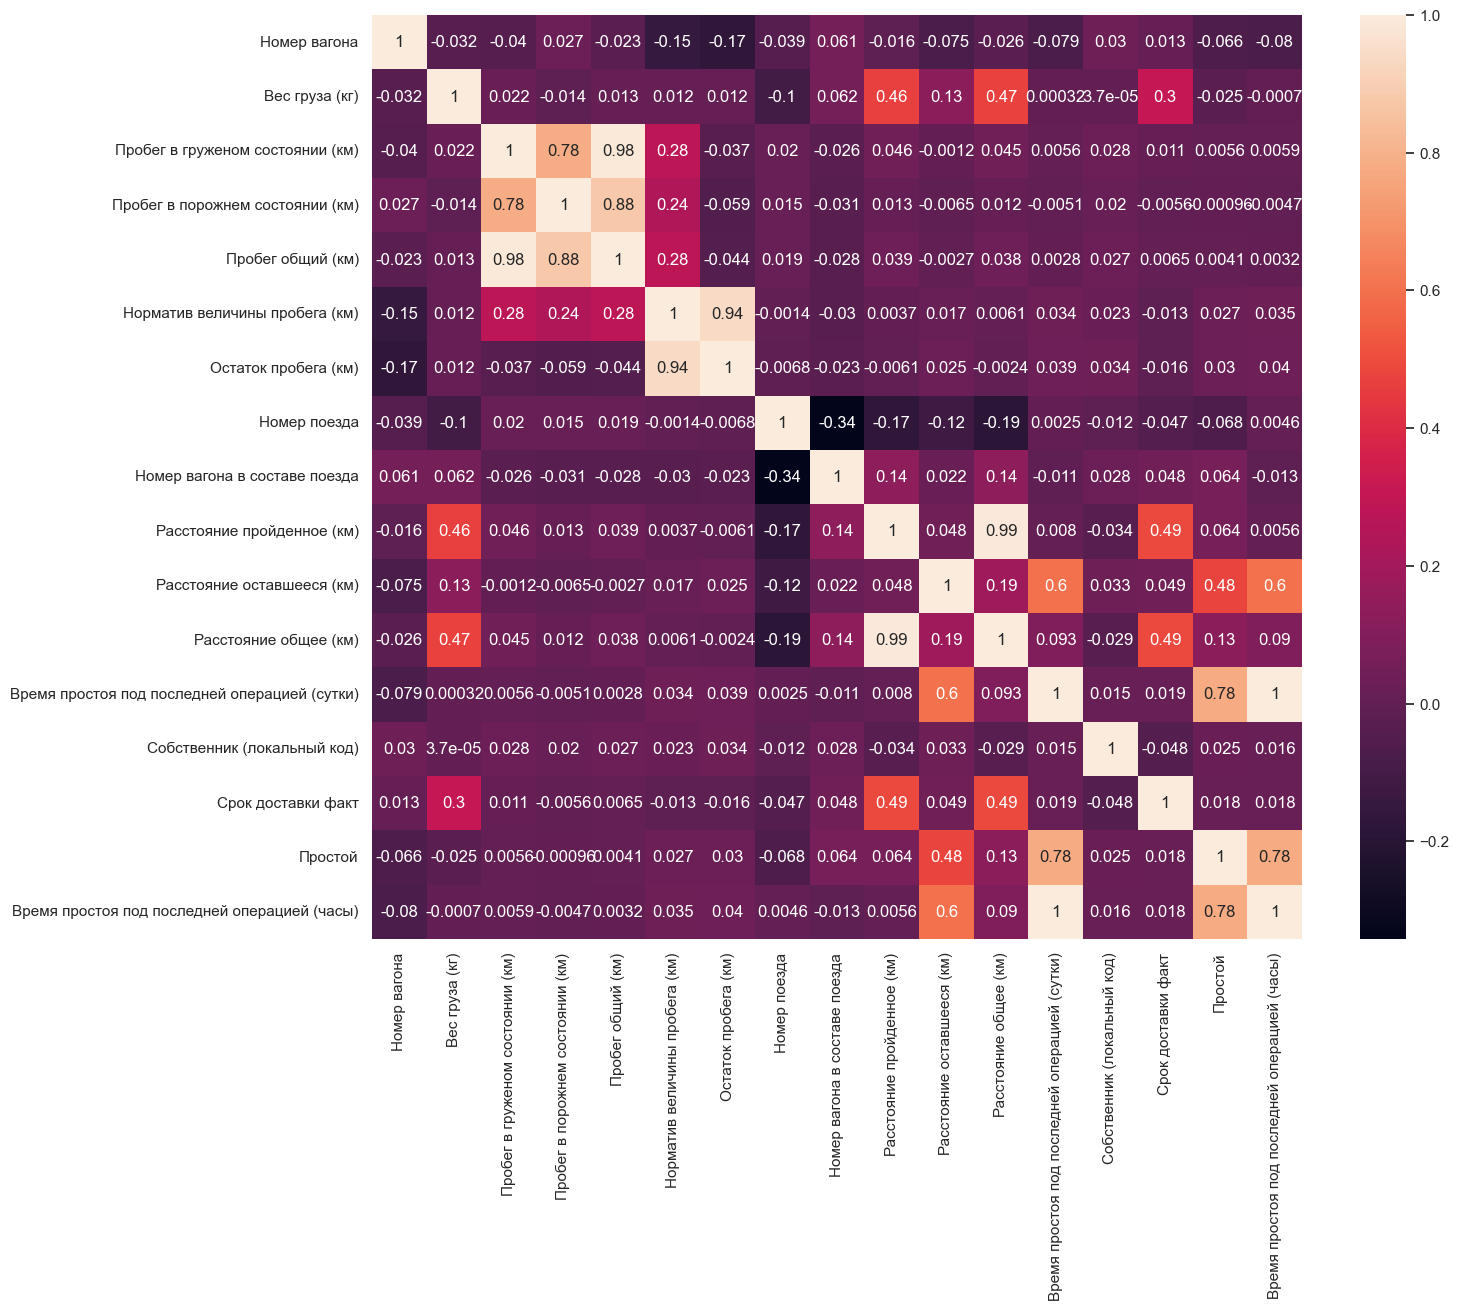

In [80]:
# Проверим визуально данные на мультиколлениарность 
info_cargo_imp_kol_new = info_cargo_imp.select_dtypes(include = [int,float])
corr_matrix = info_cargo_imp_kol_new.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True)

Здесь есть, что можно убрать